# **Informações do Projeto**
Objetivo: realizar uma análise de seguro imobiliário a fim de tentar predizer valor de apólice para novos assegurados.

# **Bibliotecas de Tratativa, limpeza extração e Análise Exploratório**

In [ ]:
# Modegal de dados
import pandas as pd

# Matemática
import numpy as np

# Plotagem de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Biblioteca / função para irgnorar avisos
from warnings import filterwarnings

# **Corregando a base de dados**

In [ ]:
#Plan 01 = Contem dados de entrada usados para treino
#Plan 02 = Novos dados de entrada para avaliar aprovação
#Dados = Os dados foram gerados de forma aleatória para fins de criação do modelo
df =  pd.read_csv("https://raw.githubusercontent.com/robsonbatista/BD_model/main/Projetos/Random%20Forest/SegurosRF_plan01.csv",delimiter=';')


## **Sobre os dados:**
A coluna serviço contem as informações do tipo de registro referente ao seguro do proprietário da pólice, onde:

**1 - Não usou**

**2 - Utilizou**

**3 - Houve futado**

In [ ]:
df.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [ ]:
df.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


## Gerando gráficos para compreender os dados


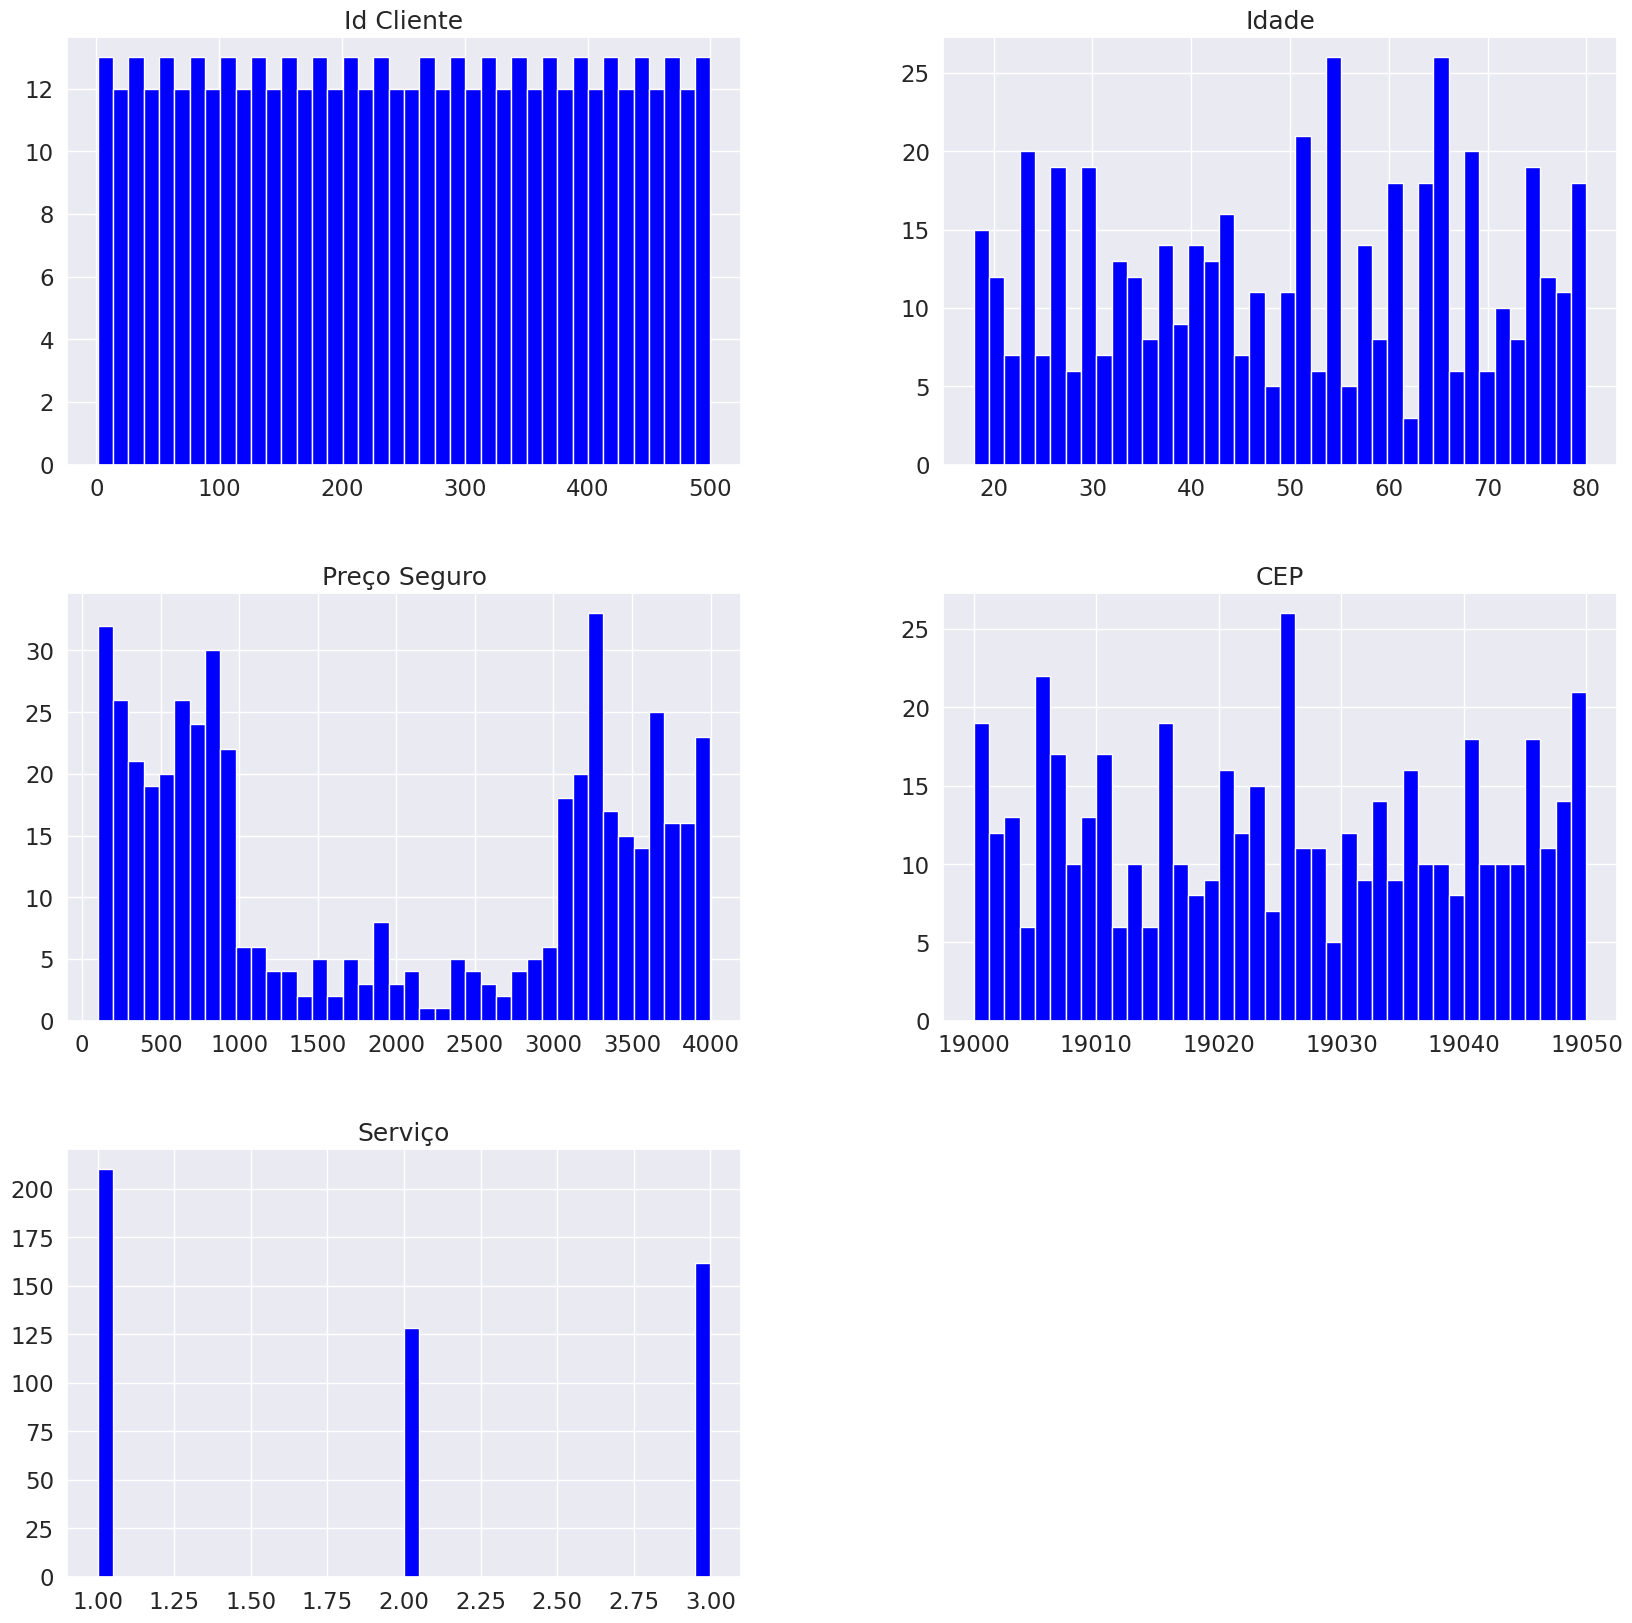

In [ ]:
sns.set(
    # tamanho da fonte
    font_scale = 1.5,
    #Estilo do gráfico e tamanho do gráfico
    rc={'figure.figsize':(20,20)})
    #Bins é o tamanho das distribuições
    #color é a gor das barras
eixo = df.hist(bins=40,color='blue')


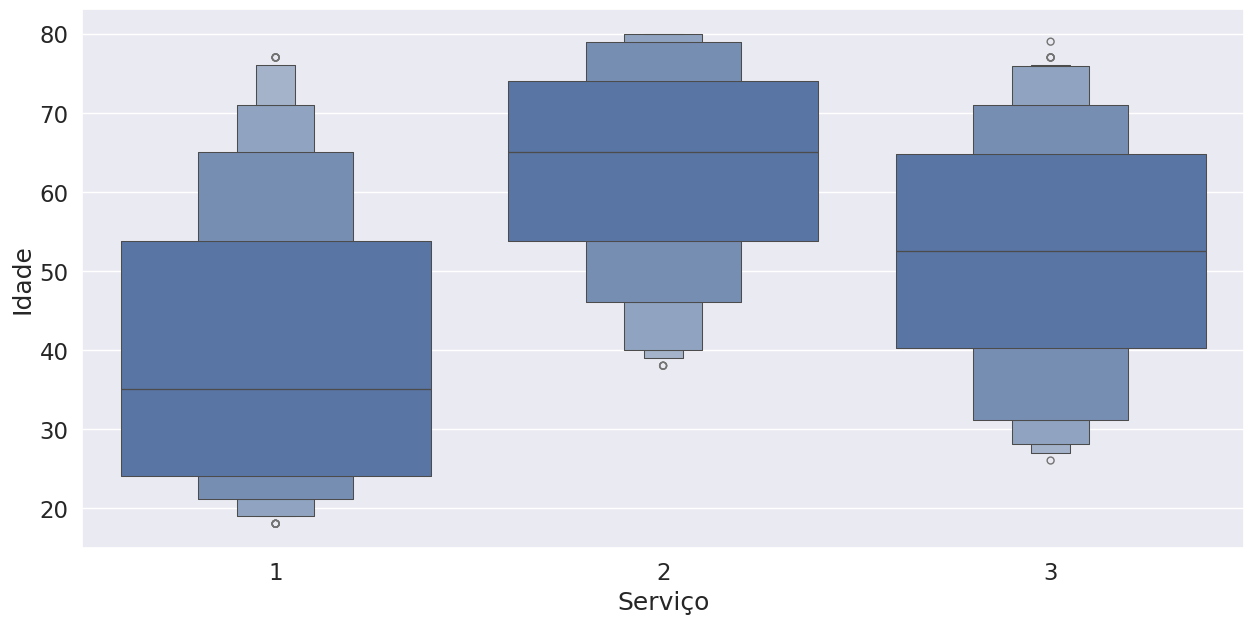

In [ ]:
#figsize é referente a altura e a largura da imagem plotada
plt.figure(figsize=(15,7) )
# usamos a caixa de plot para ver a realação entre os dados serviço e idade
sns.boxenplot(data=df, x= 'Serviço', y='Idade');

### interpretando o boxenplot:
Serviço 01:  as pessoas com idade inferior a 30 anos tende a usar o serviço com menor frequencia, tendo a média entre 30 a 40 anos

Serviço 02: as pessoas com maior idade, com média entre 60 e 70 anos tendem a fazer uma maior utilização de algums serviço coberto pela apólice.

Serviço 03: Tipo de serviço de furto fica intercado tendo a média entre 40 a 65 anos.

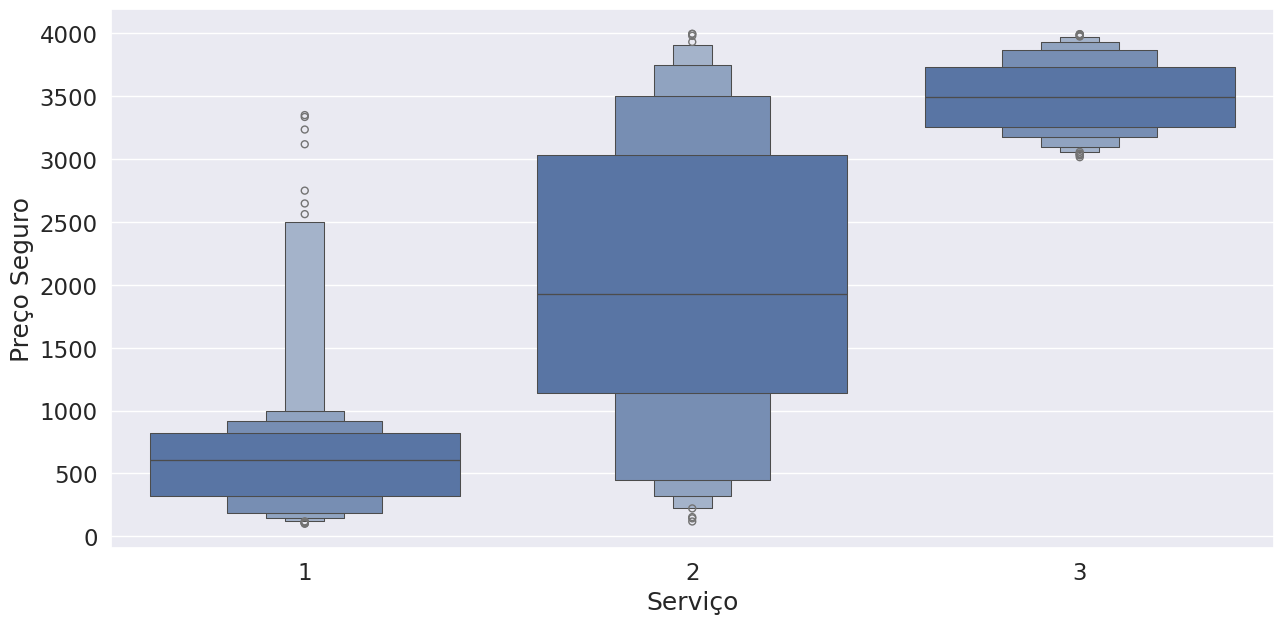

In [ ]:
#figsize é referente a altura e a largura da imagem plotada
plt.figure(figsize=(15,7) )
# usamos a caixa de plot para ver a realação entre os dados serviço e idade
sns.boxenplot(data=df, x= 'Serviço', y='Preço Seguro');

### interpretando o boxenplot:
Aqui podemos identificar que as pessoas que utilizam o serviço de 03 (furto), tendem a ter seguros com apólice em torno de  3500  em média, sem os valores mais altos. Já os que utilizam o serviço possui um distribuição maior, variando entre 1200 a 3000. Pessoas que não utilizam o serviço tem a menor taxa de pagamento, sendo inferior a 700.

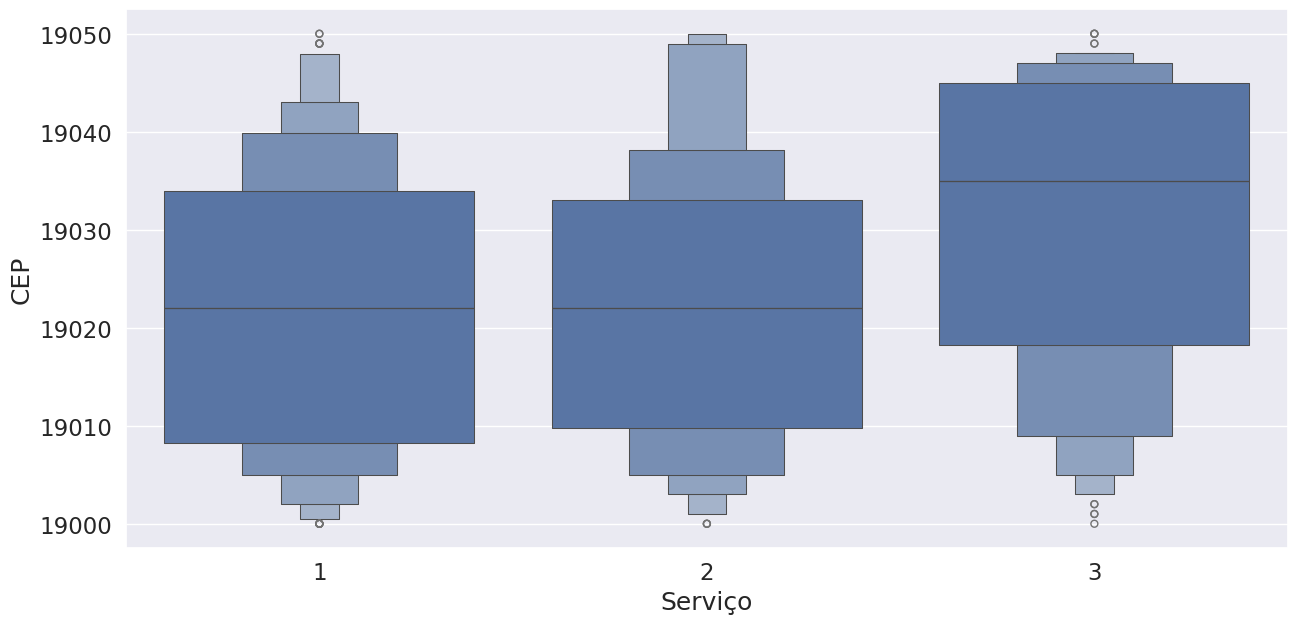

In [ ]:
#figsize é referente a altura e a largura da imagem plotada
plt.figure(figsize=(15,7) )
# usamos a caixa de plot para ver a realação entre os dados serviço e idade
sns.boxenplot(data=df, x= 'Serviço', y='CEP');

### interpretando o boxenplot:
Ao relacionar serviço pelo CEP dos assegurados, podemos identificar que o há uma distribuição mais equilibrada entre as regiões, podem, as regiões que ficam com CEP entre 19030 e 19040 possuem uma maior tendência a furto. com alguns valos outliers para CEPs abaixo de 19005.

# **Machine Learning**


---

Vamos começar dividindo nossos dados em fase de treino e teste


In [ ]:
# para seprarar os dados de treino e teste, necessitas identificar o valores de x e y
# sendo y  (Idade,Preço Seguro, CEP) as caolunas de características
# e x a colna de serviço
caracteristicas = df.iloc[:,1:-1].values
caracteristicas

array([[   69,  3930, 19005],
       [   27,  3336, 19027],
       [   49,  3936, 19001],
       ...,
       [   58,  1520, 19019],
       [   72,  3155, 19029],
       [   54,  3656, 19034]])

In [ ]:
 previsor = df.iloc[:,-1:].values


## Biblioteca de Michene Learning

In [ ]:
#instalando a versão mais recendo da biblioteca sklearn
!pip install -U scikit-learn

In [ ]:
# importando modulo de treino e teste
from sklearn.model_selection import train_test_split

In [ ]:
x_traino, x_teste, y_treino, y_teste = train_test_split(
    caracteristicas,
    previsor,
    test_size = 0.10,
    random_state=15
)

print(len(df))
print(len(x_traino))
print(len(x_teste))

500
450
50


In [ ]:
#importando a biblioteca utilizada para fazer o Random Florest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
algoritmo_floresta_aleatoria = RandomForestClassifier(
    # criar o número de arvores na floresta
    n_estimators=400
    )
# vamos passar os dados de treino e teste para ser terinado na arvore de decisão
# irá retornar entre as 400 arvores de devisão, vai retornar o melhor resultado
algoritmo_floresta_aleatoria.fit(x_traino,y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=400)

[[30  1  0]
 [ 2  6  3]
 [ 0  0  8]]


<Axes: >

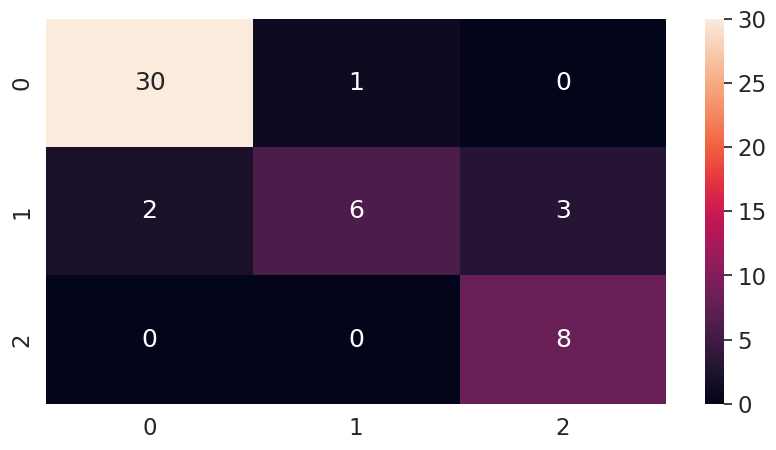

In [ ]:
previsoes = algoritmo_floresta_aleatoria.predict(x_teste)

from sklearn.metrics import confusion_matrix
# o algorítimo pede os dados originais (y_teste), nossos dados que não sofreram alteração e os dados que prevemos (X_teste)
matriz_confusão = confusion_matrix(y_teste,previsoes)
print(matriz_confusão)

plt.figure(
    figsize=(10,5))

sns.heatmap(matriz_confusão, annot=True)

**interpretando os dados**

Para cada linha e coluna indica o número de acertos e erros referente aos serviços, separados anteriormente na variável previsões. Cruzendo as informações entre os serviços "Não usou" x " Utilizado" x "Houve futado".


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

           1       0.94      0.97      0.95        31
           2       0.86      0.55      0.67        11
           3       0.73      1.00      0.84         8

    accuracy                           0.88        50
   macro avg       0.84      0.84      0.82        50
weighted avg       0.89      0.88      0.87        50



## **interpretando a classificação**

O Report comparou o que foi real das previsões (y_teste) com o que foi previso.
Primeiramente vamos olhar para o recall, ele indica a taxa de acerto, ou seja, o que ele classificou como certo ou errado. Para o tipo de serviço utilizado. o primeiro indicou que 97% das predições estavam corretas, sendo uma ótima taxa de acerto, porém o que se remete a taxa de utilização, a aprendizagem foi ruim. Para o acerto referente ao índice 3, não utilização do seguro. A taxa de 88 representa um bom índice.

As taxas de precisão estão todas acima de 70%, do qual representa um bom índice de acerto. Porém, o ideal é que todas as taxas estivessem acima de 80%.

Mesmo com a precisão de 86%, porque a precisão do serviço 2 (Utilizou) deu abaixo dos 70% ? Isso ocorreu devido ter uma quantidade muito baixa de registros análise, havendo somente 128 registros.

Trazendo o dado mais relevante do Report, a nossa acurácia foi registrada de 86%, é a média harmônico e indica o tão bem que a o nosso modelo aprendeu.


In [ ]:
#vamos printar a quantidade de serviços registrados no DataFrame
print(df.iloc[:,4].explode().value_counts())

Serviço
1    210
3    162
2    128
Name: count, dtype: int64


In [ ]:
x_traino

array([[   27,  3525, 19045],
       [   31,  3901, 19018],
       [   63,   938, 19034],
       ...,
       [   24,   224, 19035],
       [   29,  3945, 19048],
       [   35,  3119, 19008]])

# **Texte prático**
Vamos simular como utilizar a simulação com o modelo criado. Com uma nova lista de clientes, vamos identificar se a apólice do seguro será aprovada ou negad.

In [ ]:
# vamos importar os dados com os novos clientes
novas_vendas = pd.read_csv('https://raw.githubusercontent.com/robsonbatista/BD_model/main/Projetos/Random%20Forest/SegurosRF_plan02.csv',delimiter=';')
novas_vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [ ]:
novas_vendas.iloc[:,1:4]

,Idade,Preço Seguro,CEP
0,25,801,19001
1,27,1090,19027
2,45,364,19030
3,30,2428,19014
4,32,891,19020
5,36,823,19025
6,44,3895,19032
7,36,457,19023
8,40,427,19008
9,40,928,19009


In [ ]:
# utilizaremos os dados necessário para qual tipo de serviço esse cliente irá utilizar
# removemos a coluna do ID e armazenamos somente os características do cliente
prever_novas = novas_vendas.iloc[:,1:4].values

In [ ]:
novas_vendas['Previsao do Modelo'] = algoritmo_floresta_aleatoria.predict(prever_novas)

In [ ]:
novas_vendas

,Id Cliente,Idade,Preço Seguro,CEP,Previsao do Modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
5,1006,36,823,19025,1
6,1007,44,3895,19032,3
7,1008,36,457,19023,1
8,1009,40,427,19008,1
9,1010,40,928,19009,1


# Vamos observar a arvore de decisão

In [ ]:
df.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [ ]:
x = df.iloc[:,1:4]
x.head()

,Idade,Preço Seguro,CEP
0,69,3930,19005
1,27,3336,19027
2,49,3936,19001
3,60,157,19009
4,51,3998,19050


In [ ]:
y = df['Serviço']
y.head()

0    3
1    1
2    3
3    1
4    2
Name: Serviço, dtype: int64

In [ ]:
x_tr, x_ts,y_tr,y_ts = train_test_split(x,y, test_size=0.30, random_state=15)

[Text(0.5769230769230769, 0.875, 'x[1] <= 3010.0\ngini = 0.659\nsamples = 350\nvalue = [139, 96, 115]'),
 Text(0.3076923076923077, 0.625, 'x[1] <= 1028.5\ngini = 0.456\nsamples = 208\nvalue = [135, 73, 0]'),
 Text(0.15384615384615385, 0.375, 'x[0] <= 49.0\ngini = 0.208\nsamples = 144\nvalue = [127, 17, 0]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.025\nsamples = 78\nvalue = [77, 1, 0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.367\nsamples = 66\nvalue = [50, 16, 0]'),
 Text(0.46153846153846156, 0.375, 'x[0] <= 37.0\ngini = 0.219\nsamples = 64\nvalue = [8, 56, 0]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 56\nvalue = [0, 56, 0]'),
 Text(0.8461538461538461, 0.625, 'x[0] <= 78.5\ngini = 0.317\nsamples = 142\nvalue = [4, 23, 115]'),
 Text(0.7692307692307693, 0.375, 'x[2] <= 19048.5\ngini = 0.294\nsamples = 139\nvalue = [4, 20, 115]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.264\nsamp

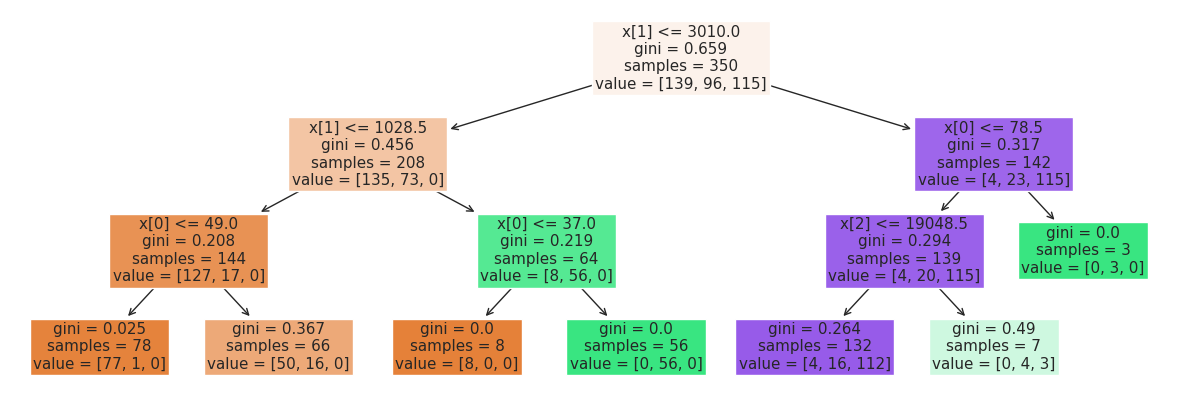

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=15)
dt.fit(x_tr, y_tr)

from sklearn.tree import plot_tree
plt.figure(figsize=(15,5))
plot_tree(dt, filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=15, n_estimators=2)
rf.fit(x_tr,y_tr)

RandomForestClassifier(max_depth=2, n_estimators=2, random_state=15)

[Text(0.5, 0.8333333333333334, 'x[0] <= 37.5\ngini = 0.657\nsamples = 223\nvalue = [135, 89, 126]'),
 Text(0.25, 0.5, 'x[2] <= 19043.5\ngini = 0.312\nsamples = 52\nvalue = [71, 0, 17]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.24\nsamples = 46\nvalue = [68, 0, 11]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.444\nsamples = 6\nvalue = [3, 0, 6]'),
 Text(0.75, 0.5, 'x[0] <= 78.0\ngini = 0.652\nsamples = 171\nvalue = [64, 89, 109]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.65\nsamples = 164\nvalue = [64.0, 80.0, 109.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 9, 0]')]

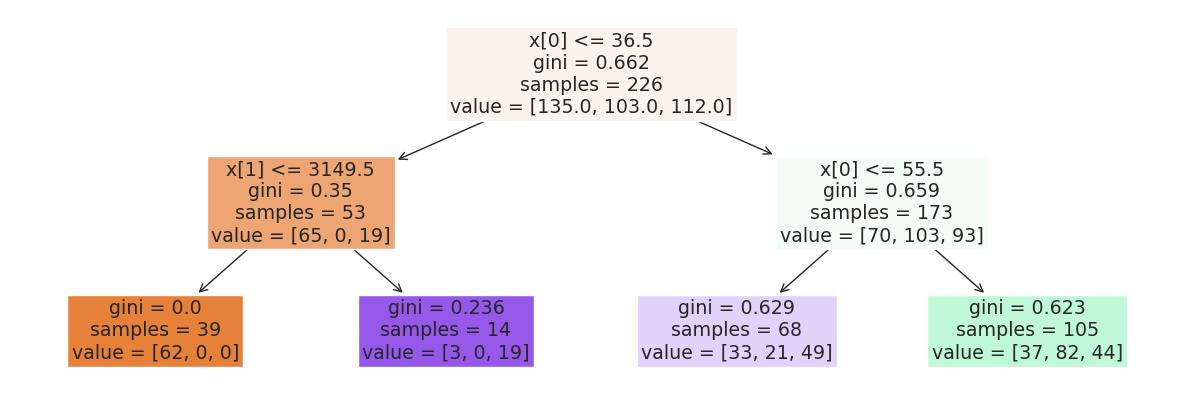

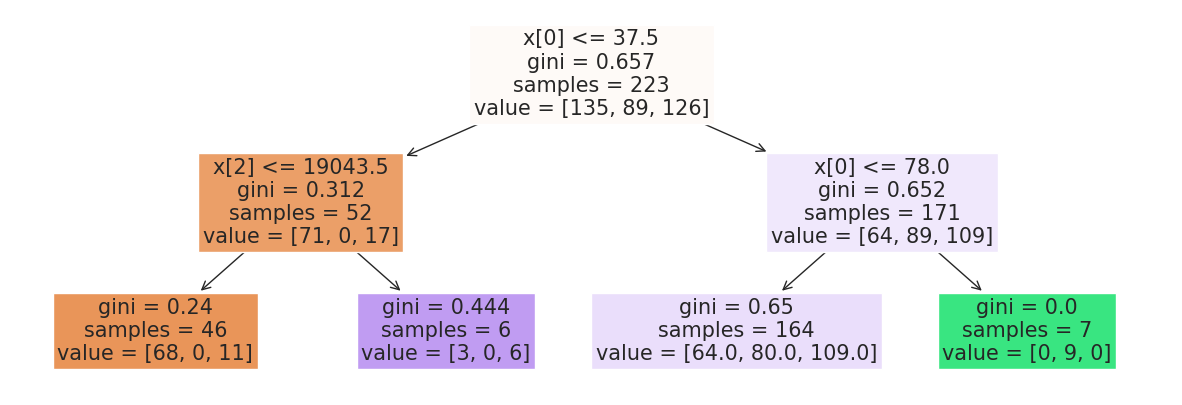

In [ ]:
plt.figure(figsize=(15,5))
plot_tree(rf.estimators_[0],filled=True)
plt.figure(figsize=(15,5))
plot_tree(rf.estimators_[1],filled=True)